## Apply the Random Forests algorithm but this time only by upscaling the data.

In [5]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
cat = pd.read_csv('C:/Users/JoãoCabral/JC88Main/Week7/Day4/Lab random forests/files_for_lab/categorical.csv')
num = pd.read_csv('C:/Users/JoãoCabral/JC88Main/Week7/Day4/Lab random forests/files_for_lab/numerical.csv')
target = pd.read_csv('C:/Users/JoãoCabral/JC88Main/Week7/Day4/Lab random forests/files_for_lab/target.csv')

In [7]:
display(cat.shape)
display(num.shape)
target.shape

(95412, 22)

(95412, 315)

(95412, 2)

In [8]:
target = target.drop(columns=['TARGET_D'])
target

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [9]:
data = pd.concat([num, cat, target], axis = 1)

In [10]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,12,92,8,94,2,95,12,89,11,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,2,93,10,95,12,95,12,93,10,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,2,91,11,92,7,95,12,90,1,0
3,0,70.000000,1,4,2,0,23,14,31,3,...,1,87,11,94,11,95,12,87,2,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,1,93,10,96,1,96,1,79,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,2,96,2,96,2,96,2,96,2,0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,1,96,3,96,3,96,3,96,3,0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,1,96,3,95,1,96,10,94,10,0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,5,90,11,96,8,97,1,86,12,1


In [11]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [12]:
data.isna().sum().sum()

0

In [16]:
# set TARGET_B as variable to be analyzed and droping it from df

y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [17]:
display(X.head())
y

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,...,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,...,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,2,91,11,92,7,95,12,90,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,28,1,87,11,94,11,95,12,87,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,20,1,93,10,96,1,96,1,79,3


0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [19]:
# train test split before upscaling.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [20]:
X_train_num = X_train.select_dtypes(np.number)
X_train_num.reset_index(drop=True,inplace=True)

X_train_cat = X_train.select_dtypes(np.object)
X_train_cat.reset_index(drop=True,inplace=True)

X_test_num = X_test.select_dtypes(np.number)
X_test_num.reset_index(drop=True,inplace=True)

X_test_cat = X_test.select_dtypes(np.object)
X_test_cat.reset_index(drop=True,inplace=True)

C:\Users\JoãoCabral\AppData\Local\Temp\ipykernel_13640\590437114.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(np.object)
C:\Users\JoãoCabral\AppData\Local\Temp\ipykernel_13640\590437114.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(np.object)


In [21]:
display(X_train_num.head())
display(X_train_cat.head())
display(X_test_num.head())
X_test_cat.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,58.000000,2,9,0,0,37,36,20,5,...,40,1,94,5,95,1,96,3,94,5
1,1,80.000000,4,9,0,0,42,6,79,6,...,18,1,90,11,96,1,96,1,90,10
2,0,61.611649,5,9,0,2,51,46,33,4,...,0,2,90,3,94,12,96,1,86,8
3,1,78.000000,5,9,0,7,32,46,31,0,...,20,5,89,9,94,7,95,12,89,9
4,1,78.000000,5,9,0,0,0,0,0,0,...,19,11,88,9,94,1,96,10,88,9


,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,WA,U,F,L,D,A,T
1,FL,H,M,L,E,A,C
2,other,H,F,L,D,B,T
3,FL,H,M,L,F,A,C
4,FL,H,M,L,E,C,R


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,74.0,1,6,0,0,0,0,0,0,...,24,1,93,10,95,4,95,9,93,10
1,0,33.0,5,9,0,0,22,63,23,13,...,65,2,90,11,94,9,95,7,90,10
2,0,42.0,5,9,0,0,27,58,0,7,...,55,8,92,5,96,2,96,2,86,9
3,1002,30.0,4,9,0,0,32,26,35,8,...,67,12,93,9,94,9,96,3,93,9
4,28,74.0,6,7,6,1,43,29,37,9,...,24,3,90,5,94,7,96,1,90,5


,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,A,R
1,CA,H,F,L,F,A,C
2,TX,H,F,L,G,A,S
3,other,H,M,L,F,B,T
4,FL,H,F,L,E,B,C


In [23]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_categorical_train = encoder.transform(X_train_cat).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train)
X_train = pd.concat([X_train_num, encoded_categorical_train], axis = 1)
X_train.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,14,15,16,17,18,19,20,21,22,23
0,0,58.000000,2,9,0,0,37,36,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,80.000000,4,9,0,0,42,6,79,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,61.611649,5,9,0,2,51,46,33,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,78.000000,5,9,0,7,32,46,31,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,78.000000,5,9,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [24]:
encoded_categorical_test = encoder.transform(X_test_cat).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test)
X_test = pd.concat([X_test_num, encoded_categorical_test], axis = 1)
X_test.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,14,15,16,17,18,19,20,21,22,23
0,0,74.0,1,6,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,33.0,5,9,0,0,22,63,23,13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,42.0,5,9,0,0,27,58,0,7,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1002,30.0,4,9,0,0,32,26,35,8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,74.0,6,7,6,1,43,29,37,9,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test.isna().sum().sum()

0

In [26]:
y_train.reset_index(drop=True)

0        0
1        0
2        0
3        0
4        0
        ..
71554    0
71555    0
71556    0
71557    0
71558    0
Name: TARGET_B, Length: 71559, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)
X_train_scaled_np = MinMaxtransformer.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns) #
X_test_scaled_np = MinMaxtransformer.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np , columns=X_test.columns)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
X_train=X_train_scaled_df
X_test=X_test_scaled_df

In [29]:
# Start of Upsampling

In [30]:
# for Upsampling we need to temporarily concat X_train and y_train like. in class we did it for downsampling also

trainset = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
trainset = trainset.reset_index(drop=True)
print(len(trainset[trainset['TARGET_B']==0]))
len(trainset[trainset['TARGET_B']==1])

67917


3642

In [31]:
category_1 = trainset[trainset['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==0]), replace=True)
print(category_1.shape)

category_0 = trainset[trainset['TARGET_B']== 0 ]
trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']

print(X_train.shape)

(67917, 355)
(135834, 354)


In [32]:
X_test.shape

(23853, 354)

In [33]:
X_train.isna().sum().sum()

0

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23853 entries, 0 to 23852
Columns: 354 entries, TCODE to 23
dtypes: float64(354)
memory usage: 64.4 MB


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135834 entries, 45091 to 25546
Columns: 354 entries, TCODE to 23
dtypes: float64(354)
memory usage: 367.9 MB


In [36]:
# Applying random forest

from sklearn.metrics import confusion_matrix


clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The accuracy for the Random Forest in the TRAIN set is 0.62
The accuracy for the Random Forest in the TEST  set is 0.62


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0    22652
1     1201
Name: TARGET_B, dtype: int64

array([[14165,  8487],
       [  536,   665]], dtype=int64)

In [37]:
y_pred_train  = clf.predict(X_train)
print("The first predictions on the TRAIN set are: ",y_pred_train[:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The first predictions on the TRAIN set are:  [0 1 1 0 0]


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))

The accuracy in the TEST set is: 0.62
The precision in the TEST set is: 0.07
The recall in the TEST set is: 0.55
The F1 in the TEST set is: 0.13


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76     22652
           1       0.07      0.55      0.13      1201

    accuracy                           0.62     23853
   macro avg       0.52      0.59      0.44     23853
weighted avg       0.92      0.62      0.73     23853



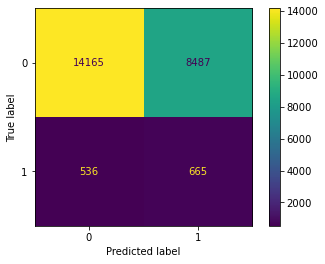

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm_test = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [41]:
from sklearn.metrics import cohen_kappa_score
print("The kappa score in the TRAIN set is: {:.3f}".format(cohen_kappa_score(y_test, y_pred)))

The kappa score in the TRAIN set is: 0.043


Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [ ]:
# 8487 are False Positive

# 536 are False Negative

# There are more false positives than false negatives
# The cost of notifying people that are predicted to donate is not worth because it will make no influence
#The False Negative eventually will donate

# Accuracy might be possible to improve with SMOTE?
